In [1]:
import pandas as pd
from sklearn.datasets import fetch_covtype
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import inspect
from IPython.display import Markdown

np.random.seed(42)

# Dataframe in a window

In [2]:
def View(df):
    css = """<style>
table {
  border-collapse: collapse;
  border: 3px solid #eee;
}
table tr th:first-child {
  background-color: #eeeeee;
  color: #333;
  font-weight: bold;
}
table thead th {
  background-color: #eee;
  color: #000;
}
tr, th, td {
  border: 1px solid #ccc;
  border-width: 1px 0 0 1px;
  border-collapse: collapse;
  padding: 3px;
  font-family: monospace;
  font-size: 12px;
}</style>"""
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\').replace("'", r"\'") + '\';'
    s += '</script>'
    return(HTML(s+css))

In [3]:
data = fetch_covtype()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
View(df.head())

# Pandas: querying, filtering and chaining

## Chaining operations

In [5]:
df_sales = pd.DataFrame({
    'CustomerID': np.random.randint(1, 9, size=50),
    'SaleDate': np.random.choice(pd.date_range('2020-03-01', periods=50), 50),
    'Amount': np.random.randint(100, 1000, size=50),
    'TransactionFee': np.random.randint(1, 10, size=50)
})
df_customer = pd.DataFrame({
    'CustomerID': range(1, 51),
    'StartDate': np.random.choice(pd.date_range('2020-01-01', periods=50), 50),
    'Total': np.random.randint(10000, 100000, size=50),
    'Birthday': np.random.choice(pd.date_range('1980-01-01', freq="M", periods=150), 50)
})

In [6]:
display(df_sales.head())
display(df_customer.head())

,CustomerID,SaleDate,Amount,TransactionFee
0,7,2020-04-16,819,8
1,4,2020-04-13,848,6
2,5,2020-03-03,437,3
3,7,2020-04-06,978,1
4,3,2020-03-07,152,3


,CustomerID,StartDate,Total,Birthday
0,1,2020-02-18,21411,1987-09-30
1,2,2020-02-18,12911,1992-02-29
2,3,2020-01-12,77270,1990-08-31
3,4,2020-02-08,93763,1989-02-28
4,5,2020-01-02,18680,1986-10-31


### Without chaining

In [7]:
before = '2020-04-01'
after = '2020-03-01'
df = df_sales.query("@after<=SaleDate<=@before")
df.loc[:, "Total"] = df.Amount + df.TransactionFee
df_sales_stats = df.groupby("CustomerID").agg({"Total": [sum, "mean"]})
df_sales_stats = df_sales_stats.sort_values(("Total", "sum"), ascending=False).reset_index()
df_sales_stats

CustomerID Total            
               sum        mean
0          8  3587  896.750000
1          4  3039  506.500000
2          3  2271  454.200000
3          5  2227  371.166667
4          6  1738  579.333333
5          7  1491  372.750000
6          2  1232  410.666667
7          1   485  485.000000

### With chaining

In [8]:
before = '2020-04-01'
after = '2020-03-01'
df_sales\
    .query("@after<=SaleDate<=@before")\
    .eval("Total = Amount + TransactionFee")\
    .groupby("CustomerID")\
    .agg({"Total": [sum, "mean"]})\
    .sort_values(("Total", "sum"), ascending=False)\
    .reset_index()\
    .astype({"CustomerID": "int32"})

CustomerID Total            
               sum        mean
0          8  3587  896.750000
1          4  3039  506.500000
2          3  2271  454.200000
3          5  2227  371.166667
4          6  1738  579.333333
5          7  1491  372.750000
6          2  1232  410.666667
7          1   485  485.000000

## Querying and piping dataframes

In [ ]:
year = 2020
total = 2000

### Filtering without `query`

In [10]:
df_monthly_spend = df_customer\
.groupby([df_customer.StartDate.dt.year.rename("year"), df_customer.StartDate.dt.month.rename("month")])\
.Total.sum()\
.reset_index()
df_top_months = df_monthly_spend[((df_monthly_spend.year==year) & (df_monthly_spend.Total>total))]
df_top_months

,year,month,Total
0,2020,1,1360465
1,2020,2,1110502


### Filtering using `query`

In [11]:
df_top_months = df_customer\
.groupby([df_customer.StartDate.dt.year.rename("year"), df_customer.StartDate.dt.month.rename("month")])\
.Total.sum()\
.reset_index()\
.query("year==@year and Total>@total")
df_top_months

,year,month,Total
0,2020,1,1360465
1,2020,2,1110502


### Using `pipe`

In [12]:
df_month = df_sales\
.query("SaleDate.dt.year==@year")\
.pipe(
    lambda df_filtered: df_filtered\
    .groupby(df.SaleDate.dt.month.rename("Month"))\
    .Amount.sum()\
    .reset_index()
)
df_month

,Month,Amount
0,3.0,15885


## Stacked bar charts: group and unstack
You could download the data from [my original notebook](https://www.kaggle.com/shaildeliwala/exploratory-analysis-and-predictions) or use the dummy data generated below. Note that the result of the analysis and the subsequent visualization will look different in both cases.

In [13]:
no_of_books = np.random.randint(1, 6, size=20)
is_alive = np.random.choice([0, 1], size=20)
sr_no = np.arange(1, 21)

predictions = pd.DataFrame({
    'no_of_books': no_of_books,
    'isAlive': is_alive,
    'S.No': sr_no
})

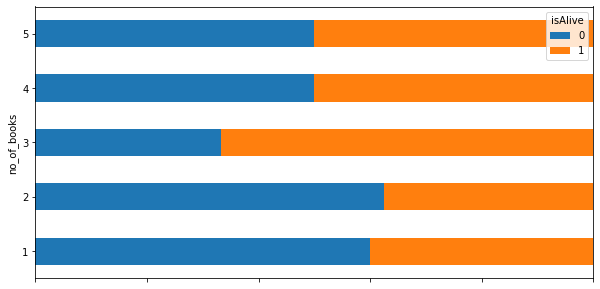

In [14]:
data = predictions\
.groupby(["no_of_books", "isAlive"])\
.count()["S.No"]\
.unstack()

p = data\
.div(data.sum(axis=1), axis=0)\
.plot.barh(stacked=True, rot=0, figsize=(10, 5), width=.5)
_ = p.set(xticklabels="", xlim=[0, 1],)

## Pandas: time-based aggregates

### Using `groupby`

In [15]:
df_sales.groupby(
    df_sales.SaleDate.dt.floor("D")
).Amount.sum().to_frame()

,Amount
SaleDate,
2020-03-02,552
2020-03-03,437
2020-03-04,1586
2020-03-06,478
2020-03-07,595
2020-03-08,1420
2020-03-09,430
2020-03-10,939
2020-03-14,1337


### Using `resample`
Note that the missing periods are assigned a default amount of zero.

In [16]:
df_sales.set_index("SaleDate").resample("D").Amount.sum().to_frame()

,Amount
SaleDate,
2020-03-02,552
2020-03-03,437
2020-03-04,1586
2020-03-05,0
2020-03-06,478
2020-03-07,595
2020-03-08,1420
2020-03-09,430
2020-03-10,939


## Pandas: top and bottom records

### Using `sort_vaules`

In [17]:
df_customer.sort_values(["Birthday", "Total"], ascending=[False, False]).iloc[:5]

,CustomerID,StartDate,Total,Birthday
11,12,2020-01-02,11802,1992-04-30
34,35,2020-01-22,61407,1992-03-31
1,2,2020-02-18,12911,1992-02-29
15,16,2020-02-06,57254,1992-01-31
8,9,2020-02-18,98614,1991-10-31


### Using `nlargest`

In [18]:
df_customer.nlargest(5, ["Birthday", "Total"])

,CustomerID,StartDate,Total,Birthday
11,12,2020-01-02,11802,1992-04-30
34,35,2020-01-22,61407,1992-03-31
1,2,2020-02-18,12911,1992-02-29
15,16,2020-02-06,57254,1992-01-31
8,9,2020-02-18,98614,1991-10-31


## Jupyter: Pretty-printing intermediate outputs

### Output with `print`

In [19]:
for id_ in df_sales.CustomerID.unique():
    df = df_sales.query("CustomerID==@id_")
    df.index.name = id_
    print(df.head())

    CustomerID   SaleDate  Amount  TransactionFee
7                                                
0            7 2020-04-16     819               8
3            7 2020-04-06     978               1
8            7 2020-03-18     287               5
11           7 2020-03-14     140               9
41           7 2020-03-14     132               8
    CustomerID   SaleDate  Amount  TransactionFee
4                                                
1            4 2020-04-13     848               6
16           4 2020-03-20     956               4
24           4 2020-03-14     238               2
29           4 2020-03-04     518               7
32           4 2020-04-11     872               1
    CustomerID   SaleDate  Amount  TransactionFee
5                                                
2            5 2020-03-03     437               3
6            5 2020-03-09     316               3
7            5 2020-04-08     863               1
15           5 2020-03-02     164               4


### Output with `display`

In [20]:
for id_ in df_sales.CustomerID.unique():
    df = df_sales.query("CustomerID==@id_")
    df.index.name = id_
    display(df.head())

,CustomerID,SaleDate,Amount,TransactionFee
7,,,,
0,7,2020-04-16,819,8
3,7,2020-04-06,978,1
8,7,2020-03-18,287,5
11,7,2020-03-14,140,9
41,7,2020-03-14,132,8


,CustomerID,SaleDate,Amount,TransactionFee
4,,,,
1,4,2020-04-13,848,6
16,4,2020-03-20,956,4
24,4,2020-03-14,238,2
29,4,2020-03-04,518,7
32,4,2020-04-11,872,1


,CustomerID,SaleDate,Amount,TransactionFee
5,,,,
2,5,2020-03-03,437,3
6,5,2020-03-09,316,3
7,5,2020-04-08,863,1
15,5,2020-03-02,164,4
21,5,2020-03-08,747,7


,CustomerID,SaleDate,Amount,TransactionFee
3,,,,
4,3,2020-03-07,152,3
10,3,2020-03-25,592,7
12,3,2020-04-19,256,3
13,3,2020-03-09,114,7
19,3,2020-03-07,443,7


,CustomerID,SaleDate,Amount,TransactionFee
8,,,,
5,8,2020-03-21,891,5
14,8,2020-03-26,912,1
17,8,2020-03-28,938,5
18,8,2020-04-16,620,7
23,8,2020-04-04,162,6


,CustomerID,SaleDate,Amount,TransactionFee
2,,,,
9,2,2020-03-04,479,7
22,2,2020-04-16,571,3
27,2,2020-04-19,491,6
33,2,2020-03-04,589,1
42,2,2020-03-31,147,9


,CustomerID,SaleDate,Amount,TransactionFee
6,,,,
20,6,2020-04-13,228,4
25,6,2020-03-17,598,9
26,6,2020-04-05,692,5
34,6,2020-03-29,330,9
48,6,2020-04-09,198,8


,CustomerID,SaleDate,Amount,TransactionFee
1,,,,
31,1,2020-03-06,478,7
37,1,2020-04-13,234,9
38,1,2020-04-03,300,3


## Inspecting function definitions

In [21]:
symbol = pd.merge
display(Markdown(f"```python\n{inspect.getsource(symbol)}```"))

```python
@Substitution("\nleft : DataFrame or named Series")
@Appender(_merge_doc, indents=0)
def merge(
    left: DataFrame | Series,
    right: DataFrame | Series,
    how: str = "inner",
    on: IndexLabel | None = None,
    left_on: IndexLabel | None = None,
    right_on: IndexLabel | None = None,
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes: Suffixes = ("_x", "_y"),
    copy: bool = True,
    indicator: bool = False,
    validate: str | None = None,
) -> DataFrame:
    op = _MergeOperation(
        left,
        right,
        how=how,
        on=on,
        left_on=left_on,
        right_on=right_on,
        left_index=left_index,
        right_index=right_index,
        sort=sort,
        suffixes=suffixes,
        indicator=indicator,
        validate=validate,
    )
    return op.get_result(copy=copy)
```